1
['description', 'available']
2
3
['mcpdf', 'alternative', 'pdftk', 'fixed', 'unicode', 'issues,', 'write', 'łódź', 'forms.']
4
5
6
7
8
9
10
11
['nan']
12
['nan']
13
['nan']
14
['nan']
15
['nan']
16
['nan']
17
['nan']
18
['shape/s∀f∃:', 'static', 'prover/type-checker', 'n-d', 'array', 'programming', 'scala,', 'use', 'case', 'intuitionistic', 'type', 'theory']
19
['shape/s∀f∃:', 'static', 'prover/type-checker', 'n-d', 'array', 'programming', 'scala,', 'use', 'case', 'intuitionistic', 'type', 'theory']
20
['shape/s∀f∃:', 'static', 'prover/type-checker', 'n-d', 'array', 'programming', 'scala,', 'use', 'case', 'intuitionistic', 'type', 'theory']
21
['reactive', 'sparql', 'client', 'written', 'scala', 'akka']
22
['arrowhead', 'application', 'library', '|', 'java', 'spring-boot']
23
['nan']
24
['java', 'client', 'library', 'dialogflow']
25
['java', 'client', 'library', 'dialogflow']
26
['android', 'sdk', 'dialogflow']
27
28
['bleckwen', 'jvm', 'xgboost', 'predictor']
29
30
['java', 'client'

C:\Users\sadma\AppData\Local\Temp\ipykernel_9668\1946645829.py:195: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax2.boxplot(


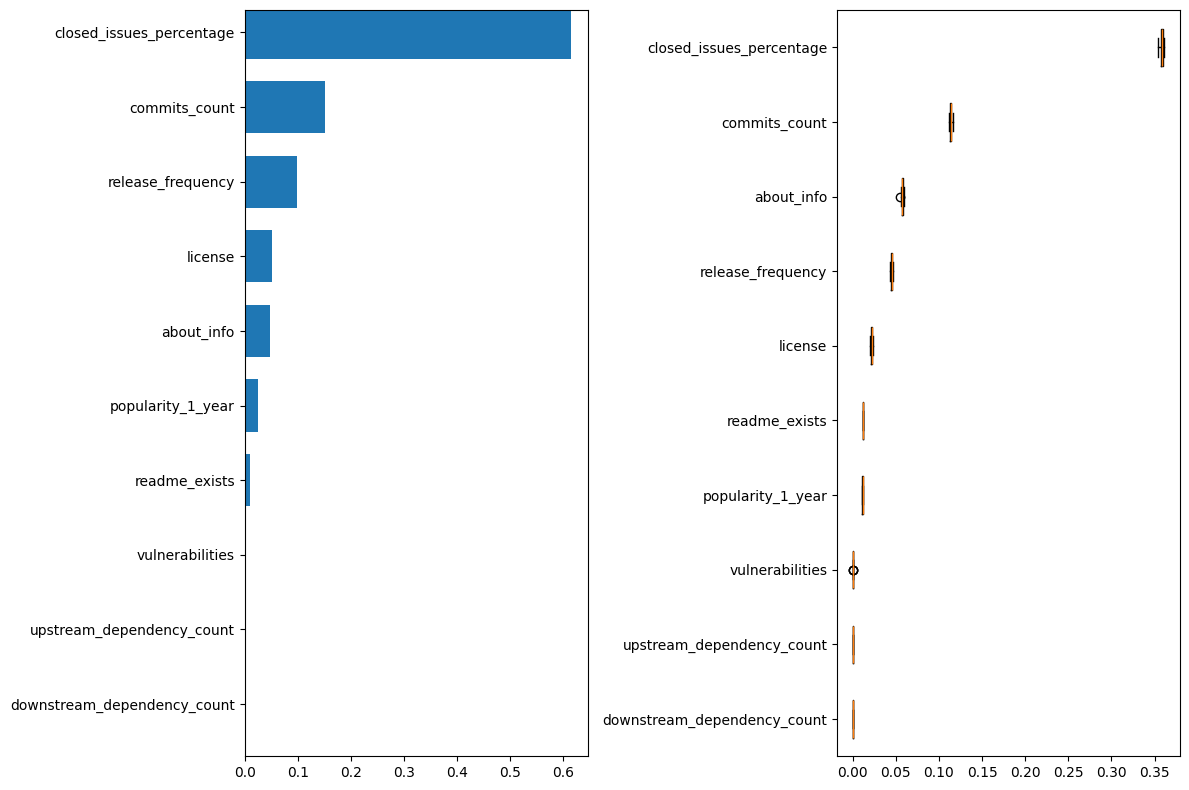

c:\Users\sadma\Documents\Thesis\Mining\Analysis\myenv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\sadma\Documents\Thesis\Mining\Analysis\myenv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


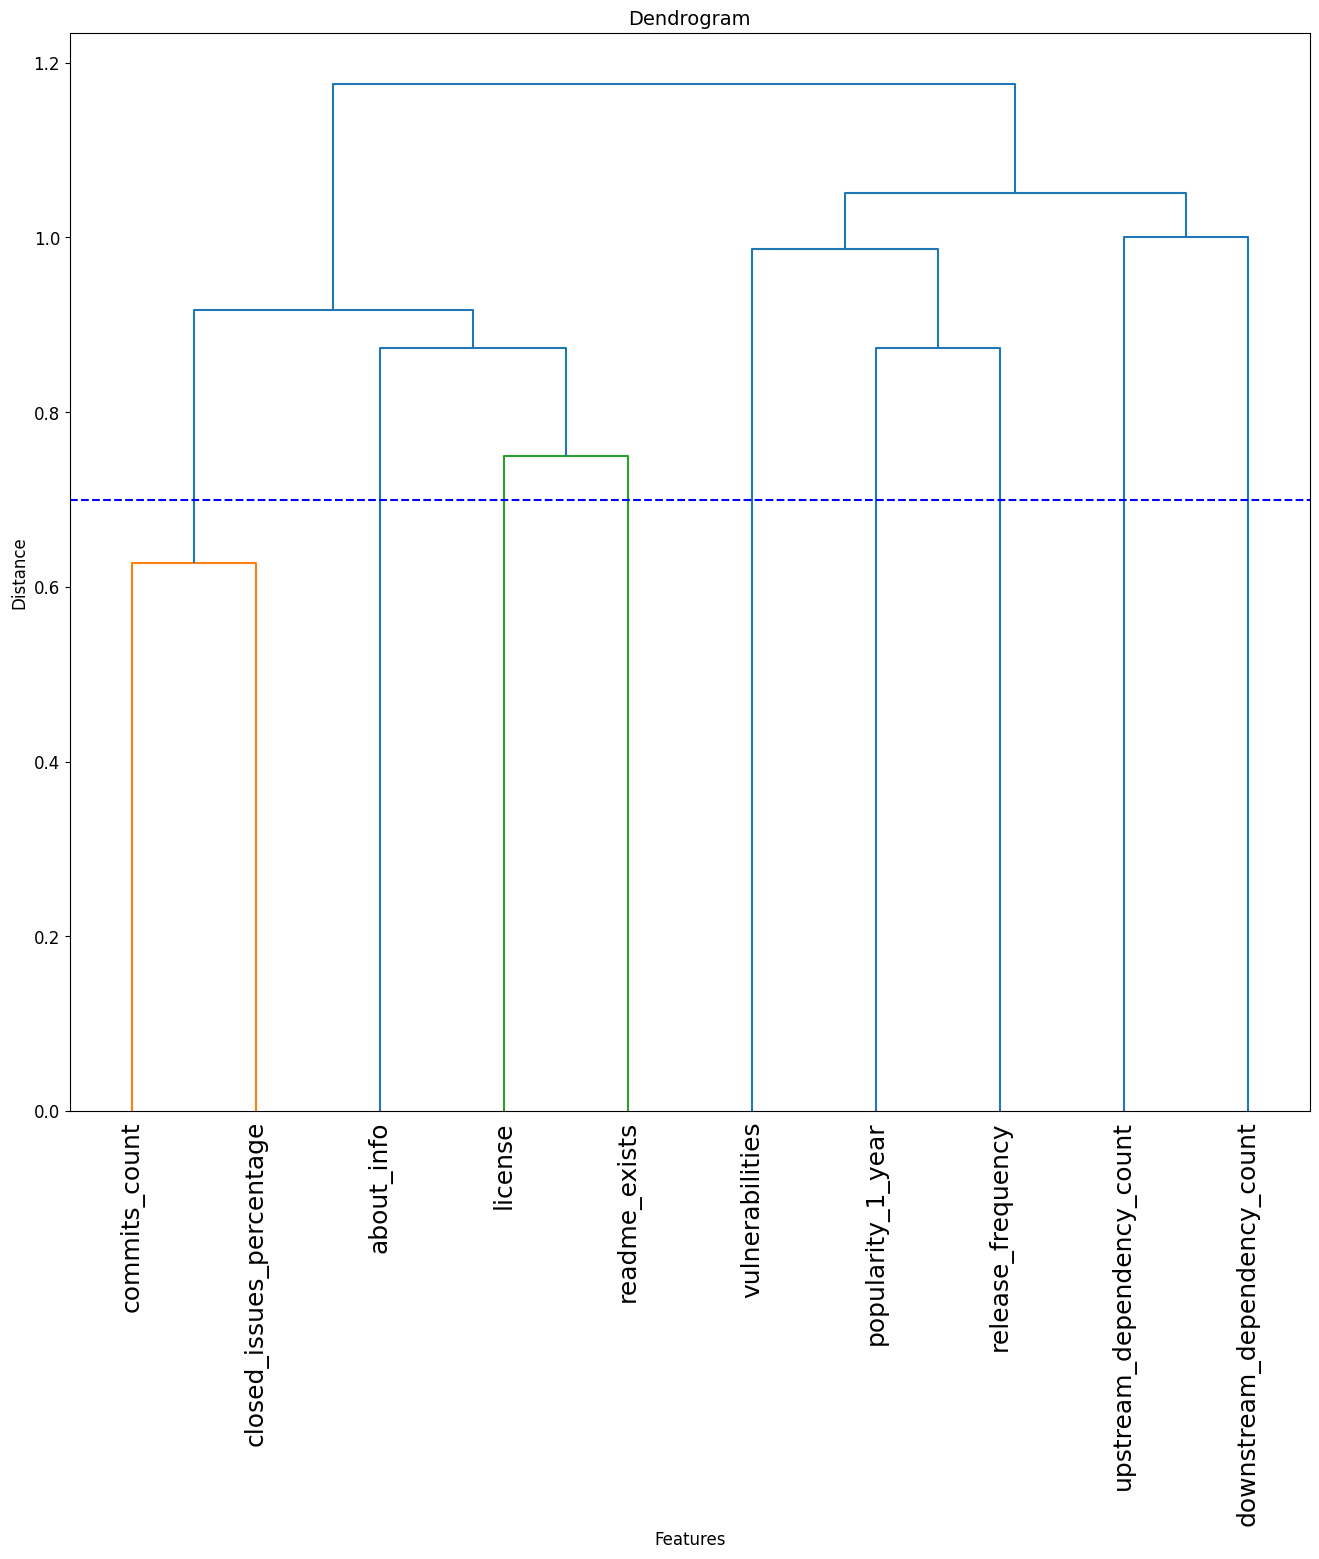

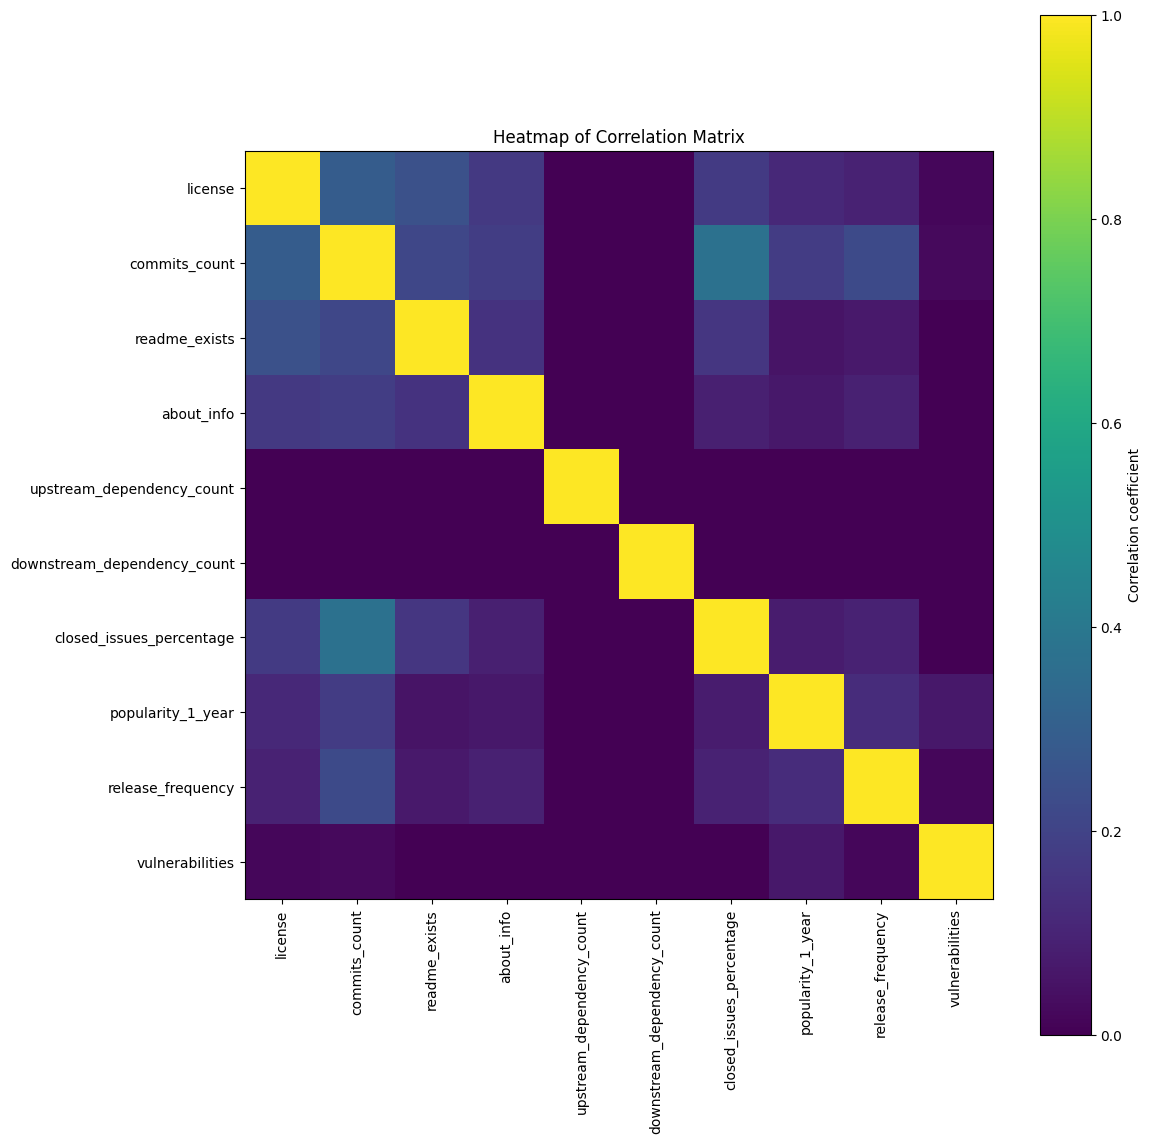

[0, 1, 2, 3, 4, 5, 7, 8, 9]
Selected feature indices: [0, 1, 2, 3, 4, 5, 7, 8, 9]
Selected feature names: ['license', 'commits_count', 'readme_exists', 'about_info', 'upstream_dependency_count', 'downstream_dependency_count', 'popularity_1_year', 'release_frequency', 'vulnerabilities']
Accuracy on test data with features removed: 0.85


In [ ]:
import os
import pandas as pd
import numpy as np
from scipy.stats import mannwhitneyu
from cliffs_delta import cliffs_delta
import re
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from scipy.stats import spearmanr
from scipy.cluster import hierarchy
from scipy.spatial.distance import squareform
import matplotlib.pyplot as plt
from collections import defaultdict
import os
import pandas as pd
from collections import Counter
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from datetime import datetime

def unique_word_count(text):
    text_data = text

    words = text_data.lower().split()
    filtered_words = [word for word in words if word not in ENGLISH_STOP_WORDS]
    print(filtered_words)
    count = 0
    unique_word = {}

    for word in filtered_words:
        if word not in unique_word:
            unique_word[word] = 1
            count += 1
    return count
# Initialize lists to store data
star_count = []
fork_count = []
pull_requests = []
subscribers = []
license_info = []
tags_count = []
open_issues_count = []
closed_issues_count = []
contributors_count = []
commits_count = []
readme_exists = []
about_info = []
upstream_dependency_count = []
downstream_dependency_count = []
open_issue_percentage = []
closed_issues_percentage = []
popularity_1_year = []
release_frequency = []
release_count = []
vulnerabilities = []

count1 = 0

# Define file paths
resolved_file_path = "combined_metrics.csv"

# Read the CSV file
df_resolved = pd.read_csv(resolved_file_path, low_memory=False)

# Append data to lists
for index, row in df_resolved.iterrows():
    count1 += 1
    print(count1)
    current_date_obj = datetime.strptime('2024-12-06', '%Y-%m-%d')
    created_at_obj = datetime.strptime(row['created_at'], '%Y-%m-%d')
    date_diff_years = abs((current_date_obj - created_at_obj).days / 365)
    if date_diff_years >= 2:
        star_count.append(row.get('stars', 0))
        fork_count.append(row.get('forks', 0))
        pull_requests.append(row.get('pull_requests', 0))
        subscribers.append(row.get('subscribers', 0))
        if 'No' in row.get('license', 'No'):
            license_info.append(0)
        else:
            license_info.append(1)
        tags_count.append(row.get('Tags Count', 0))
        open_issues_count.append(row.get('Open Issues Count', 0))
        closed_issues_count.append(row.get('Closed Issues Count', 0))
        contributors_count.append(row.get('Contributors Count', 0))
        commits_count.append(row.get('Commits Count', 0))
        readme_exists.append(1 if row.get('README Exists', False) else 0)
        text = str(row.get('About Info', ''))

        about_info.append(unique_word_count(text))
        upstream_dependency_count.append(row.get('Dependencies', 0))
        downstream_dependency_count.append(row.get('Usage', 0))
        total_count = (row['Closed Issues Count'] + row['Open Issues Count']) if (row['Closed Issues Count'] + row['Open Issues Count']) != 0 else 1
        closed_issues_percentage.append(row['Closed Issues Count'] / total_count)
        
        # Additional metrics
        popularity_1_year.append(row.get('popularity_1_year', 0))
        release_frequency.append(row.get('ReleaseFrequency', 0))
        release_count.append(row.get('Release Count', 0))
        vulnerabilities.append(row.get('Vulnerabilities', 0))

# Create a DataFrame
data = pd.DataFrame({
    'star_count': star_count,
    'fork_count': fork_count,
    'pull_requests': pull_requests,
    'subscribers': subscribers,
    'license': license_info,
    'tags_count': tags_count,
    'open_issues_count': open_issues_count,
    'closed_issues_count': closed_issues_count,
    'contributors_count': contributors_count,
    'commits_count': commits_count,
    'readme_exists': readme_exists,
    'about_info': about_info,
    'Dependencies': upstream_dependency_count,
    'Usage': downstream_dependency_count,
    'closed_issues_percentage': closed_issues_percentage,
    'popularity_1_year': popularity_1_year,
    'release_frequency': release_frequency,
    'release_count': release_count,
    'vulnerabilities': vulnerabilities
})

# Feature selection (including new metrics)
features = [
    'star_count',
    'fork_count',
    'pull_requests',
    'subscribers',
    'license',
    'tags_count',
    'open_issues_count',
    'closed_issues_count',
    'contributors_count',
    'commits_count',
    'readme_exists',
    'about_info',
    'Dependencies',
    'Usage',
    'closed_issues_percentage',
    'popularity_1_year',
    'release_frequency',
    'release_count',
    'vulnerabilities'
]



# Sort by resolution time
data_sorted = data.sort_values(by='star_count')

# Calculate the number of rows to label
n_rows = len(data_sorted)
print(n_rows)
top_20_percent = int(n_rows * 0.2)
bottom_20_percent = int(n_rows * 0.2)

# Label the top 20% as 1 and bottom 20% as 0
data_sorted['final_label'] = np.nan  # Initialize with NaN
data_sorted.iloc[:top_20_percent, data_sorted.columns.get_loc('final_label')] = 1
data_sorted.iloc[-bottom_20_percent:, data_sorted.columns.get_loc('final_label')] = 0

# Drop the middle 60%
data_labeled = data_sorted.dropna(subset=['final_label'])

X = data_labeled.drop(columns=['final_label', 'star_count'])
y = data_labeled['final_label']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Initialize and fit the XGBoost model
#clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')  # Set eval_metric to avoid warnings
# Train RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Print accuracy
print("Accuracy on test data: {:.2f}".format(clf.score(X_test, y_test)))

# Compute permutation importance
result = permutation_importance(clf, X_train, y_train, n_repeats=10, random_state=42)
perm_sorted_idx = result.importances_mean.argsort()

# Plot feature importances
tree_importance_sorted_idx = np.argsort(clf.feature_importances_)
tree_indices = np.arange(0, len(clf.feature_importances_)) + 0.7

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
ax1.barh(tree_indices, clf.feature_importances_[tree_importance_sorted_idx], height=0.7)
ax1.set_yticks(tree_indices)
ax1.set_yticklabels(X.columns[tree_importance_sorted_idx])  # Use X.columns instead of data.feature_names
ax1.set_ylim((0, len(clf.feature_importances_)))
ax2.boxplot(
    result.importances[perm_sorted_idx].T,
    vert=False,
    labels=X.columns[perm_sorted_idx],  # Use X.columns instead of data.feature_names
)
fig.tight_layout()
plt.show()

# Assuming X is your DataFrame with features
X = X.fillna(X.mean())

# Calculate the correlation matrix
corr = spearmanr(X).correlation

# Ensure the correlation matrix is symmetric
corr = (corr + corr.T) / 2
np.fill_diagonal(corr, 1)

# Handle potential NaN values in the correlation matrix
corr[np.isnan(corr)] = 0
corr[np.isinf(corr)] = 0

# Compute the distance matrix
distance_matrix = 1 - np.abs(corr)

# Ensure the distance matrix is symmetric
distance_matrix = (distance_matrix + distance_matrix.T) / 2

# Perform hierarchical clustering
dist_linkage = hierarchy.ward(squareform(distance_matrix))

# Plot dendrogram
fig, ax1 = plt.subplots(figsize=(16, 14))
dendro = hierarchy.dendrogram(dist_linkage, labels=X.columns.tolist(), leaf_rotation=90, ax=ax1)
# Adjust the font size of the labels
ax1.axhline(y=0.7, color='blue', linestyle='--', linewidth=1.5)  # Customize color, linestyle, and linewidth as needed


for label in ax1.get_xticklabels():
    label.set_fontsize(18)  # Increase the font size for x-axis labels
    
for label in ax1.get_yticklabels():
    label.set_fontsize(12)  # Increase the font size for y-axis labels

plt.title('Dendrogram', fontsize=14)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Distance', fontsize=12)
plt.show()

# Plot heatmap
fig, ax2 = plt.subplots(figsize=(12, 12))
cax = ax2.imshow(corr, cmap='viridis', interpolation='none')
ax2.set_xticks(np.arange(len(X.columns)))
ax2.set_yticks(np.arange(len(X.columns)))
ax2.set_xticklabels(X.columns, rotation=90)
ax2.set_yticklabels(X.columns)

# Add colorbar
cbar = fig.colorbar(cax)
cbar.set_label('Correlation coefficient')

plt.title('Heatmap of Correlation Matrix')
plt.tight_layout()
plt.show()

# Select features from each cluster
cluster_ids = hierarchy.fcluster(dist_linkage, 0.7, criterion="distance")
cluster_id_to_feature_ids = defaultdict(list)
for idx, cluster_id in enumerate(cluster_ids):
    cluster_id_to_feature_ids[cluster_id].append(idx)

# Choose one feature from each cluster
selected_features = [v[0] for v in cluster_id_to_feature_ids.values()]
print(selected_features)
X_train_sel = X_train.iloc[:, selected_features]
X_test_sel = X_test.iloc[:, selected_features]

selected_feature_names = X.columns[selected_features]

print("Selected feature indices:", selected_features)
print("Selected feature names:", selected_feature_names.tolist())

# Train RandomForestClassifier with selected features
clf_sel = RandomForestClassifier(n_estimators=100, random_state=42)

clf_sel.fit(X_train_sel, y_train)

# Print accuracy of the new model
print(
    "Accuracy on test data with features removed: {:.2f}".format(
        clf_sel.score(X_test_sel, y_test)
    )
)